In [1]:
%run config.ipynb #hide sensitive info from git hub 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from matplotlib import rcParams


In [2]:
RAPIDAPI_KEY    =  YOUR_RAPIDAPI_KEY 

In [3]:
try:
	a_json = json.loads(response.json()['chart'])
	print(a_json)
except:
	print("String could not be converted to JSON")

String could not be converted to JSON


In [4]:
symbol_string = "AAPL"
inputdata = {}
def fetchStockData(symbol):
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-charts"

    querystring = {"symbol":symbol,"interval":"1d","range":"3mo","region":"US","comparisons":"^GDAXI,^FCHI"}

    headers = {
        'x-rapidapi-key': RAPIDAPI_KEY ,
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
        }
    response = requests.request("GET", url, headers=headers, params=querystring)
    if (response.status_code == 200):
        return response.json()
    else:
        return None

In [5]:
def parseTimestamp(inputdata):

  timestamplist = []

  timestamplist.extend(inputdata["chart"]["result"][0]["timestamp"])
  timestamplist.extend(inputdata["chart"]["result"][0]["timestamp"])

  calendertime = []

  for ts in timestamplist:
    dt = datetime.fromtimestamp(ts)
    calendertime.append(dt.strftime("%m/%d/%Y"))

  return calendertime



def parseValues(inputdata):

  valueList = []
  valueList.extend(inputdata["chart"]["result"][0]["indicators"]["quote"][0]["open"])
  valueList.extend(inputdata["chart"]["result"][0]["indicators"]["quote"][0]["close"])

  return valueList



def attachEvents(inputdata):

  eventlist = []

  for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
    eventlist.append("open")    

  for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
    eventlist.append("close")

  return eventlist

In [6]:
test = fetchStockData("AAPL")
parseTimestamp(test)

['09/09/2021',
 '09/10/2021',
 '09/13/2021',
 '09/14/2021',
 '09/15/2021',
 '09/16/2021',
 '09/17/2021',
 '09/20/2021',
 '09/21/2021',
 '09/22/2021',
 '09/23/2021',
 '09/24/2021',
 '09/27/2021',
 '09/28/2021',
 '09/29/2021',
 '09/30/2021',
 '10/01/2021',
 '10/04/2021',
 '10/05/2021',
 '10/06/2021',
 '10/07/2021',
 '10/08/2021',
 '10/11/2021',
 '10/12/2021',
 '10/13/2021',
 '10/14/2021',
 '10/15/2021',
 '10/18/2021',
 '10/19/2021',
 '10/20/2021',
 '10/21/2021',
 '10/22/2021',
 '10/25/2021',
 '10/26/2021',
 '10/27/2021',
 '10/28/2021',
 '10/29/2021',
 '11/01/2021',
 '11/02/2021',
 '11/03/2021',
 '11/04/2021',
 '11/05/2021',
 '11/08/2021',
 '11/09/2021',
 '11/10/2021',
 '11/11/2021',
 '11/12/2021',
 '11/15/2021',
 '11/16/2021',
 '11/17/2021',
 '11/18/2021',
 '11/19/2021',
 '11/22/2021',
 '11/23/2021',
 '11/24/2021',
 '11/25/2021',
 '11/26/2021',
 '11/29/2021',
 '11/30/2021',
 '12/01/2021',
 '12/02/2021',
 '12/03/2021',
 '12/06/2021',
 '12/07/2021',
 '12/08/2021',
 '09/09/2021',
 '09/10/20

In [7]:
while len(symbol_string) <= 2:

        symbol_string = input("Enter the stock symbol: ")

retdata = fetchStockData(symbol_string)

if (None != inputdata): 

        inputdata["Timestamp"] = parseTimestamp(retdata)

        inputdata["Values"] = parseValues(retdata)

        inputdata["Events"] = attachEvents(retdata)

        df = pd.DataFrame(inputdata)

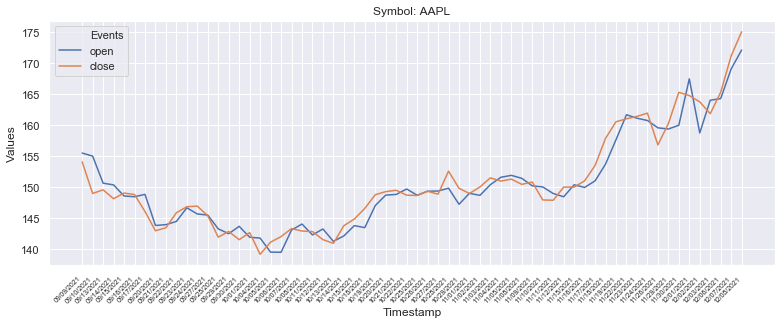

In [8]:
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 13,5
rcParams['figure.subplot.bottom'] = 0.2


ax = sns.lineplot(x="Timestamp", y="Values", hue="Events",dashes=False, markers=True, 
                   data=df, sort=False)


ax.set_title('Symbol: ' + symbol_string)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='xx-small'  
)

plt.show()

In [9]:
import requests

resp = requests.get('https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-06-01/2020-06-17?apiKey=8KxAAuJXK7mtasEMVmMTBGh1oPDoiYjB'))

"""
if resp.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))
for todo_item in resp.json():
    print('{} {}'.format(todo_item['id'], todo_item['summary']))
"""

SyntaxError: invalid syntax (<ipython-input-9-98d93abb0e7c>, line 3)

In [10]:
import requests

url = "https://api.polygon.io/v2/reference/tickers?sort=ticker&market=CRYPTO&perpage=50&page=1&apiKey=8KxAAuJXK7mtasEMVmMTBGh1oPDoiYjB"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

In [11]:
x = response.json()
x.keys()

dict_keys(['error', 'status'])

In [12]:
df=pd.DataFrame(x['tickers'])
df

KeyError: 'tickers'

In [ ]:
bb

<center>Week 1 Chart making </center>
make a log price chart
##### Chart 1
- price and time 
- Tick maker showing the highest/lowest for that week
-  on the tick mark a cross hatch to showing the closing price/ last price that week 
- Black up weeks when stock is higher than previous week
- Red opposite

###### Chart 2 (bottom) 
- 

investors.com/si

S&P  predictors and dow jones are predictaors of stock 

Make something similar check to see which coins follow each others paths
- "AI" project checking which coins are similar to which
- like put a % to it

Check to see what a coincident vs lagging indicator is

<center> Week 2: Markets Direction, Step 1 Which way is the market going</center>
The economy does not lead the the market, the market leads the economy

Important to track both price and volume
-market is down and volume increase? (Supply and demand ratio shift)
    might mean a turn
- 3 to 5 day distribution ( 4- 10 an attempt at realley may be seen -> 4-7 days from the bottom)

- Bear markets 
    open up higher at the begining of the day bu close dowb
- Bull
open lowers
lower priced lower quantitiy stocks at the top of the most active sign of weaking general economy

Recognize market bottom 





figure out when the market is going to hit the top
1. Figure what is a market Increase what is a jump from sort of standard to a big avg ( used to get as much peak data) 
Answer:
- once i have this can beging look at factors that cause what trends correlate 
- code to have all data on one stock in one go to see matching pattens

2. Once i know my answer begin collectinge data based on about that amount 
- normalize the data 
- begin tring to find predictors 
- get an idea of when i should by by what day 

- figure out range ( of when to buy and sell dont want to be at peak but a few weeks behined instead)



 
 
 

Step 2 use a simple 3-1 profit and loss percentage plan
Market leaders fall by an avg of 72 persentage and year and a half of greatest market performance



### Understanding losses 
(What my ideal percentage loss) 
Avoid 25% - 60% , heard also 7%
cut loss at no more than 7-8%

Consider Selling a few stock when they are up 20-25%
Maintaining a 3-1 ratio
- right on 30% of stock pyrchase
- wrong on 70% 
/**** In Dificult markets***/
3-5% loss 
10-15% gain


#Play with the %
Look at how much certain stocks move % wise then you can create margins to make your purchase fit with in the percatge loss


In [33]:
#When on robin hood or any securities look at percentages not gains 

# Add this in my analysis of stocks
int_price = 80
per_loss = .09 #37.5%
drop_price = int_price * (1- per_loss) # Make a class that copies this line but prints it out using varibles
print("My Loss price after {}% drop".format(per_loss*100))
print("{}={}*(1-{})".format (drop_price,int_price,per_loss))
rally = int_price / drop_price
per_gain = int((rally-1)*100)
print("to get back what I loss Prectage gain of {}%".format(per_gain))


My Loss price after 9.0% drop
72.8=80*(1-0.09)
to get back what I loss Prectage gain of 9%


In [35]:
600/800

0.75

Step 3 How to buy the very best sotck at the very best time

Create a chart with buy points 
Example of it to get better idea of which i should buy
maybe make  a fliter for these

1. Earinings per share in tha latest quarter should be up at least 25% versus the same quarter a year ago, and preferably much more
EPS = total after tax profits / number of shares outstanding
2. Earnings growth should be accelerated at some point in recent quarters compared with earlier rates of change
- accelerating means percentage gains in earnings per share there has be an accelerate growth at some point
- 6 or eight quaters steading gain jump from 20% to 40%
3. Annual earnings for that last 3 yrs should be increased at a rate of 25% per yr or more 
Lookat Investor buisnes daily eps ratin
4. Sales should be up 25 percent or more in one or more recent quarters or at least accelerating in their percentage change for the last three quarters
5. The afte tax profit margins in the most recent quarters should be either at or at least close to a new high among the very best in the company's industry
6. Return on equity should be 15 to 17 percent or higher. 
ROE - how effcient a compnay is with its money
7. Technology companies should show cash flow earnings per share greater than regular earnings 
Cash flow adds back the amount of depreciation a company shows to reflect the amount of cash being generated internally
20% or greater ussusally 
- ROE (investors.com)
8.In normal bull markets, both the earnings per share and relative strength ratings should in most cases be 90 or higher
    The EPS reating is calculated by combing a companys three yr profit growth with recent quarterly earnings 
9. The Stock's industry group should rank in the top 10 or 20 among the 197 groups tracked by investors buisness daily
Look into industry group ranks ( computer sofware , Retail, etc. 
10. The Stock should have insutituional sponsers such as mutual funds, banks, and insuarance companies 
- Look into investors who is investing in them
11. It's Usually a plus if the company is buying back its own stock preferably 5- 10 percent or more.
well establish companies 2% own by management , new more limited shares 5 to 30%
12. Its vital in any stock you buy that you really understand the story of the company 
What does the company do?
How are products or services used?
What unique advantages do they offer?
who buys them?

____________
Cup with handle 
-moves down for 5-7 weeks moves
- next move up more than half way usually 10-15%
- end of cup right side 3 week tight 
Reebok sep 1985 - jan 1986 
microstrategy sep 98 ,dec 98, mar 99, jun 99, sep99, dec 99 - mar 00 (sep 99) 

______
Saucer 
______
Double Bottom
____ 
Flat Base 
____
Ascending Base
____



Step 4 When to Sell and nail  your big profit while you still have it

Stocks go up 25- 30% and drop down if stable go up again 
-market corection
cut losses at 20 - 25%
exception if strong bull market 
3yrs earnings and sales growth, high ROE, 20% volumen in 2-3 wks
Companies to look at stock increases
America online
Fairchild Camera 